In [1]:
from sklearn.datasets import make_blobs
X,Y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=5, random_state=11)
m=200                                 

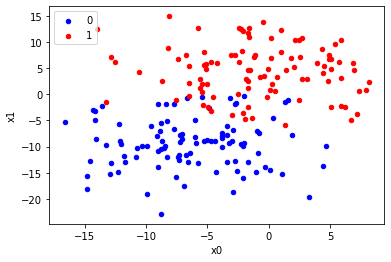

In [2]:
from matplotlib import pyplot as plt
from pandas import DataFrame
df = DataFrame(dict(x=X[:,0], y=X[:,1], label= Y))
colors = {0:'blue', 1:'red'}
fig, ax = plt.subplots()
grouped= df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind = 'scatter', x='x', y='y',label = key, color = colors[key])
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [3]:
#Defining Sigmoid Function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [4]:
#Defining Logistic function , w => vector of weights, X => input function
def logistic_funct(w,X):
    z = np.array(w[0]+ w[1]*np.array(X[:,0]) + w[2]*np.array(X[:,1]))
    return sigmoid(z)

In [7]:
#Defining Cost function
import numpy as np
def cost(w,X,Y):
    y_pred = logistic_funct(w,X)
    return (-1)*sum(Y*np.log(y_pred)+ (1-Y)*np.log(1-y_pred))
print(cost([1,1,1],X,Y))

126.96627984087802


In [8]:
#Calculate the partial differentials of the cost function for each of the weights
def gradient(w,X,Y):
    y_pred = logistic_funct(w,X)
    s = [0]*3 #Initialize slope with array
    s[0] = -1 * sum(Y*(1-y_pred) - (1-Y)*y_pred)
    s[1] = -1 * sum(Y*(1-y_pred)*X[:,0] - (1-Y)*y_pred*X[:,0])
    s[2] = -1 * sum(Y*(1-y_pred)*X[:,1] - (1-Y)*y_pred*X[:,1])
    return s

In [9]:
def gradient_descent(new_weights, prev_weights, learning_rate):
    print(prev_weights)
    print(cost(prev_weights,X,Y))
    j = 0 
    while True:
        prev_weights = new_weights
        w0 = prev_weights[0] - learning_rate*gradient(prev_weights,X,Y)[0]
        w1 = prev_weights[1] - learning_rate*gradient(prev_weights,X,Y)[1]
        w2 = prev_weights[2] - learning_rate*gradient(prev_weights,X,Y)[2]
        new_weights = [w0,w1,w2]
        print(new_weights)
        print(cost(new_weights,X,Y))
        #Check for the stop criteria
        if (new_weights[0]-prev_weights[0])**2 + (new_weights[1]-prev_weights[1])**2 + (new_weights[2]-prev_weights[2])**2 < pow(10,-6):
            return new_weights
        if j>100:
            return new_weights
        j+=1
        

In [10]:
import numpy as np
w = [1,1,1]
w = gradient_descent(w,w,0.0099)
print(w)

[1, 1, 1]
126.96627984087802
[1.2539422898588644, -0.5512710240837779, 1.1843328109648115]
112.81815690482537
[1.2400289717256012, 1.3365539538600526, 1.3041857280167006]
168.5749357223354
[1.496038556709955, -0.26091766794801896, 1.498589948744304]
75.77036936925771
[1.552998152697941, 0.5805338886016641, 1.2059963033700993]
67.88063552779857
[1.7129970823802407, -0.12884219161477717, 0.9205552719943874]
49.631255078140065
[1.721522374547689, 0.8081464107255731, 0.784948881261807]
84.65164447415044
[1.9318934810214365, -0.5853214217947893, 0.9260582355386137]
137.02236299684375
[1.792209433897121, 2.259519445068961, 1.8717281361304319]
296.375960910099
[2.0717704014100984, 0.4671501798576154, 2.2375086018139254]
96.21982855549399
[2.2275891867070294, 0.17556932949773574, 1.7757719140648793]
66.93614685472798
[2.34635073219192, 0.10042351859759649, 1.3377088708014218]
47.88369966457564
[2.420814222298708, 0.2006649466226462, 0.9803329461122527]
35.74059972551982
[2.47109414690982, 0.15

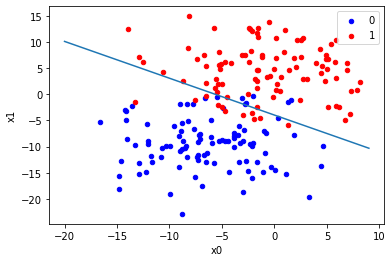

In [11]:
def y(x):
    return (-w[0]-w[1]*x)/w[2]
x = np.array(range(-20,10))
y = y(x)


from matplotlib import pyplot as plt
from pandas import DataFrame
df = DataFrame(dict(x=X[:,0], y=X[:,1], label= Y))
colors = {0:'blue', 1:'red'}
fig, ax = plt.subplots()
grouped= df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind = 'scatter', x='x', y='y',label = key, color = colors[key])
plt.xlabel('x0')
plt.ylabel('x1')
plt.plot(x,y)
plt.show()